### 6. 비지도학습
#### 6-1. 군집 알고리즘

**비지도학습**: 정답(label)이 없는 데이터를 이용해 스스로 데이터 속에서 숨겨진 패턴, 특징, 구조를 파악하는 인공지능 학습 방법

In [1]:
# 데이터 준비하기
!wget https://bit.ly/fruits_300_data -O fruits_300.npy      # 대문자 O

--2025-11-21 12:05:49--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-21 12:05:49--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-21 12:05:50--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 배열 크기 확인
# 첫 번째 차원은 샘플의 개수, 두 번째 차원은 이미지 높이, 세 번째 차원은 이미지 너비 의미 
fruits = np.load('fruits_300.npy')          # 파일 객체에서 JSON이나 다른 형식의 데이터를 읽어와 파이썬 객체(딕셔너리, 리스트 등)로 변환
print(fruits.shape)

(300, 100, 100)


In [4]:
# 첫 번째 이미지의 첫 번째 행 출력
# 3차원 배열이기 떄문에 처음 2개의 인덱스를 0으로 지정 
# 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면 첫 번째 이미지의 첫 번째 행을 모두 선택 가능
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


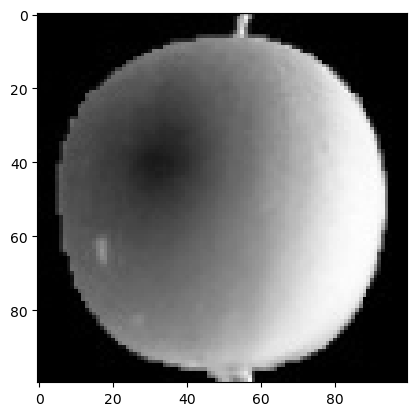

In [5]:
# 넘파이 배열로 저장된 이미지 그리기 
plt.imshow(fruits[0], cmap='gray')      # 흑백 이미지
plt.show()

이미지를 다룰 때 컴퓨터는 **숫자(픽셀값)** 으로만 판단

- 밝은 영역(255에 가까운 값)

- 어두운 영역(0에 가까운 값)

실사 사진에서는 배경이 더 밝고(거의 255), 사과가 상대적으로 어두울 수 있음

따라서 컴퓨터 입장에서 255에 가까운 밝은 영역을 **중요한 특징**으로 읽을 가능성이 높음

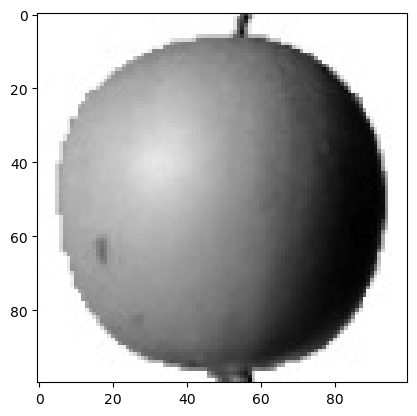

In [6]:
# 이미지의 색상을 반전시켜 출력
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

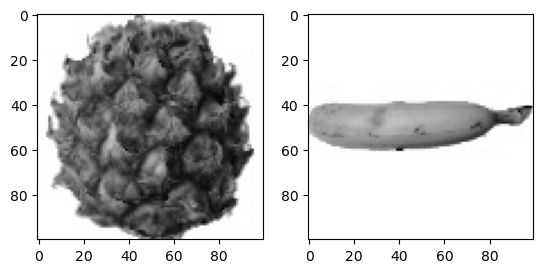

In [7]:
# 바나나와 파인애플 이미지 출력 
# subplots () 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정
fig, axs = plt.subplots(1, 2)       # fig = 캔버스, axs = 실제로 그려지는 그래프 영역 
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [8]:
# 픽셀값 분석
apple = fruits[0:100].reshape(-1, 100*100)      # -1 = 첫 번째 차원은 NumPy가 알아서 계산
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


In [9]:
# 샘플의 픽셀 평균값 계산
# axis = 0 첫 번째 축인 행을 따라 계산, axis = 1 두 번째 축인 열을 따라 계산 
print(apple.mean(axis=1))       # 샘플의 값은 가로로 나열되어 있으므로 axis=1 지정

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


**히스토그램**: 연속형 데이터의 분포를 구간(bin) 단위로 나누어, 각 구간에 속하는 데이터의 빈도(도수)를 막대 형태로 표현한 통계 그래프

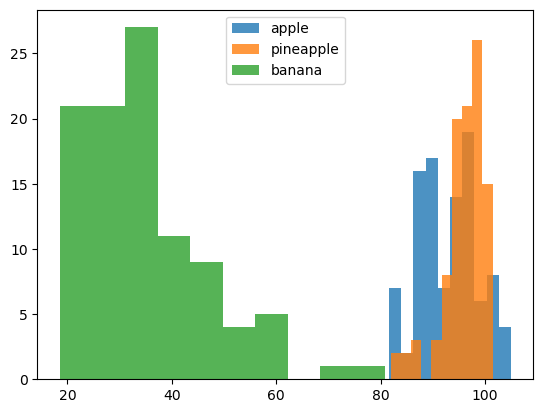

In [ ]:
# 사진의 평균값을 히스토그램으로 나타내기 
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')      # alpha 투명도 조절
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()        # 범례
plt.show()

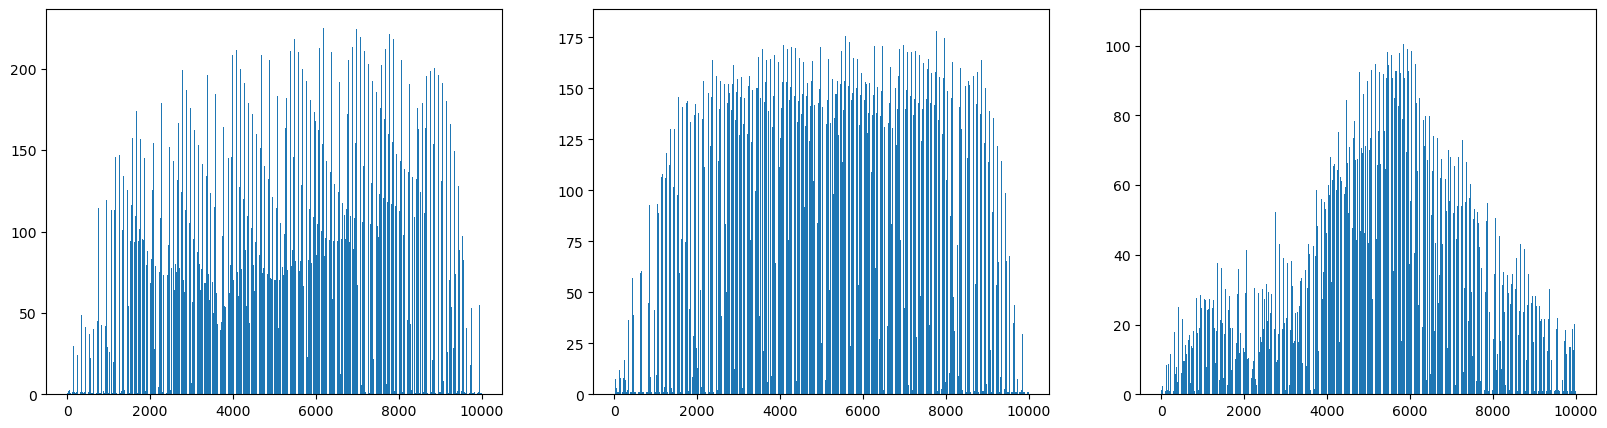

In [14]:
# 픽셀값의 평균을 막대그래프로 나타내기 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

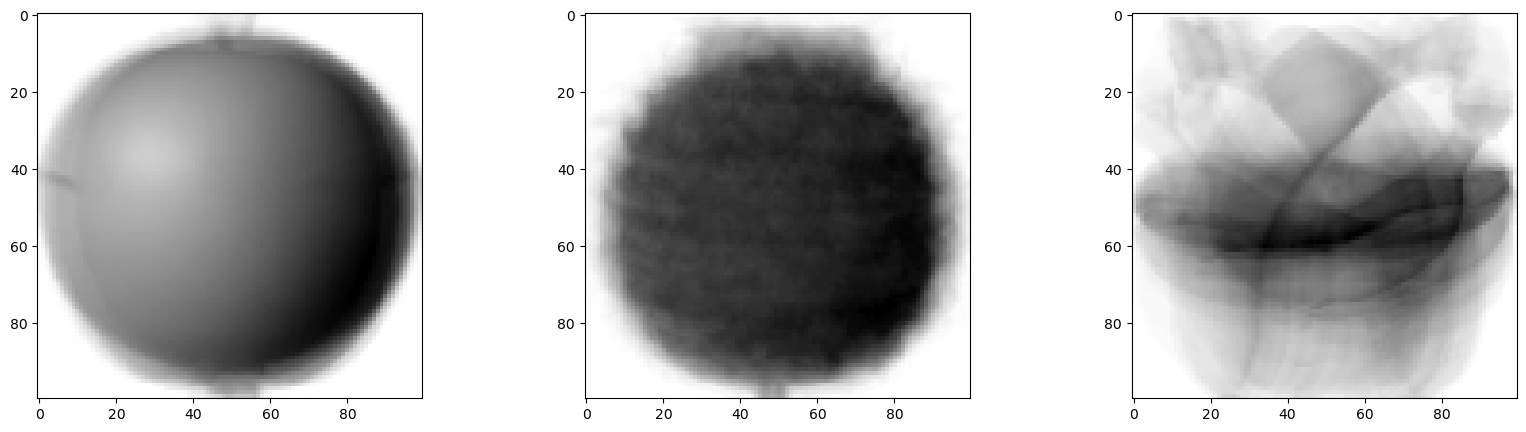

In [15]:
# 픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

데이터 분석에서는 '가깝다'는 것을 **오차(error)** 로 정의

즉, 두 이미지(벡터)가 서로 비슷한지 판단하려면

두 벡터의 차이를 구하고 `차이가 작으면 가까운 것, 차이가 크면 다른 것`

이 기준이 바로 **절댓값 오차(absolute error)** 또는 **L1 distance**

In [16]:
# 평균값과 가까운 사진 고르기
abs_diff = np.abs(fruits - apple_mean)      # abs() 절댓값 반환
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


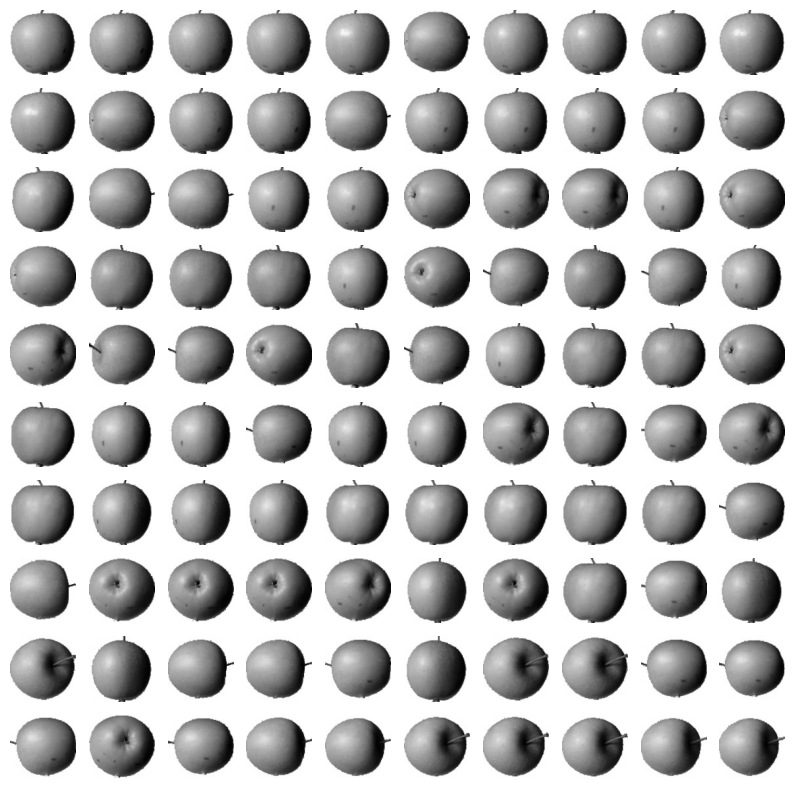

In [ ]:
# apple_mean과 오차가 가장 작은 샘플 100개 고르기
apple_index = np.argsort(abs_mean)[:100]        # np.argsort() 오름차순으로 나열한 배열의 인덱스 반환
apple_index = apple_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10, 10))       # figsize 기본값은 (8, 6)
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r')
        axs[i, j].axis('off')       # 좌표축 미표현
plt.show()

**군집(Clustering)** 비슷한 특성을 가진 데이터들을 자동으로 그룹화하는 비지도 학습 알고리즘 

**클러스터** 군집 알고리즘이 만들어낸 각 그룹


**군집을 사용하는 이유**
- 데이터 구조 파악
- 비슷한 패턴의 묶음 찾기
- 이상치 탐지(outlier detection)
- 고객 세그먼트 분석
- 이미지·문서 패턴 분석

---

#### 6-2. k-평균

**k-평균(k-means) 군집 알고리즘**: 데이터를 k개의 그룹으로 자동 분류하고 각 그룹의 중심을 계산하는 비지도 학습 기법

**클러스터 중심(cluster center)**: 클러스터에 속한 데이터들의 평균값으로 계산된 그 그룹의 대표 위치

**센트로이드(centroid)**: 클러스터 중심과 동일한 의미로, 평균값을 좌표 형태로 표현한 중심 벡터


**k-평균 알고리즘의 작동 방식**

1. 무작위로 k개의 클러스터 중심을 정합니다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경합니다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복합니다.

<img src = 'https://github.com/HANISY/AI-Study/blob/main/img/kmeans.png?raw=true' width = 700>

In [19]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-21 13:34:12--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-21 13:34:13--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-21 13:34:13--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [20]:
# 3차원 배열을 2차원 배열로 변경
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

# 비지도학습이므로 fit() 메서드에서 타깃 데이터를 사용하지 않음

KMeans(n_clusters=3, random_state=42)

In [24]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장
# labels_ 배열의 길이는 샘플 개수와 같음
# n_clusters=3 이므로 labels_ 배열의 값은 0, 1, 2 중 하나 
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [25]:
# 레이블값과 레이블 순서에는 어떤 의미도 없음 
# 레이블 0, 1, 2로 모은 샘플의 개수 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [28]:
# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)        # n은 샘플 개수 
    
    # 한 줄에 이미지 10개씩
    # 샘플 개수를 10으로 나누어 전체 행 개수 계산
    rows = int(np.ceil(n/10))

    # 행이 1개이면 열의 개수는 샘플 개수와 동일 (그렇지 않으면 10개)
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize = (cols*ratio, rows*ratio), squeeze=False)      # subplot이 한 개여도 항상 2차원 배열 형태로 반환
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:        # n개까지만 그림
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

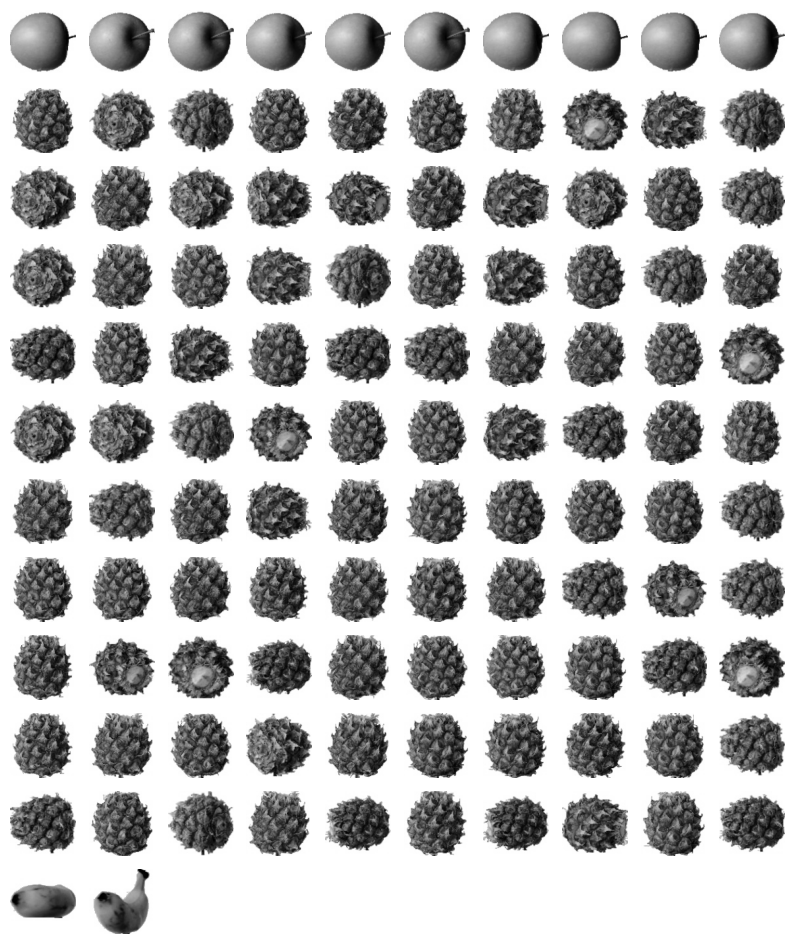

In [29]:
draw_fruits(fruits[km.labels_==0])      # 값이 0인 위치는 True, 그 외는 모두 False

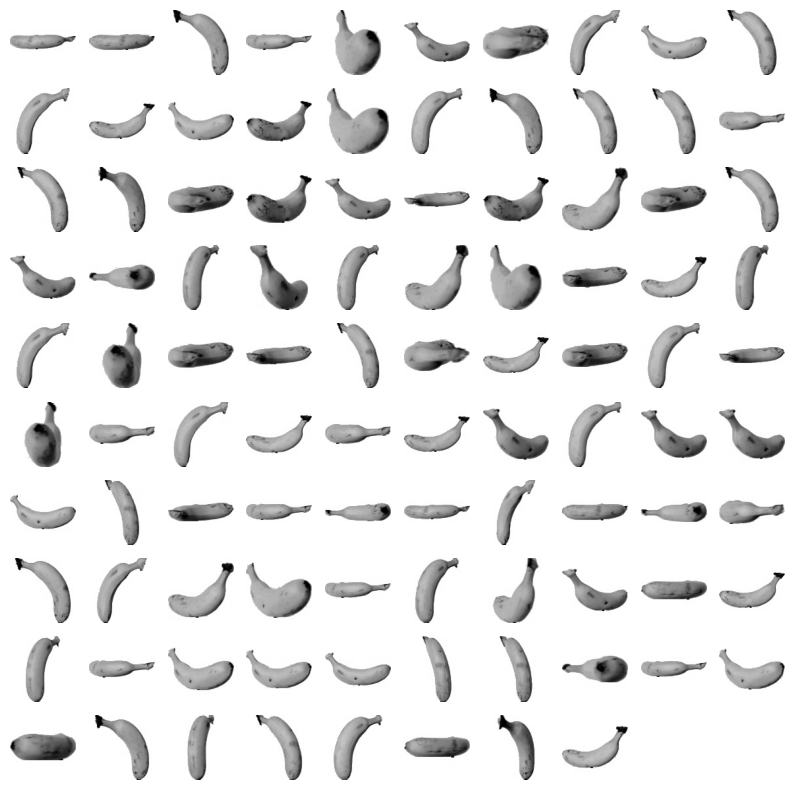

In [30]:
draw_fruits(fruits[km.labels_==1])

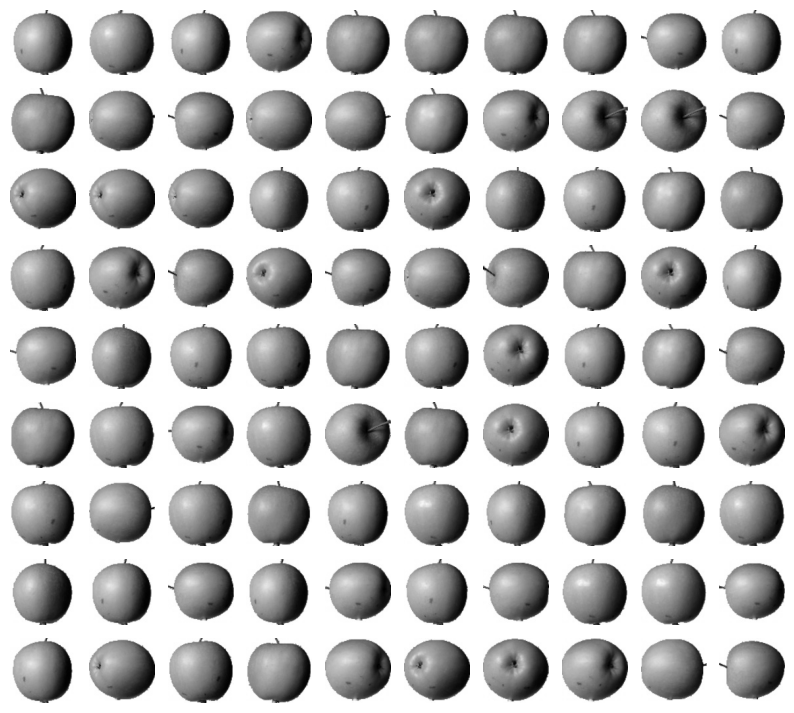

In [31]:
draw_fruits(fruits[km.labels_==2])

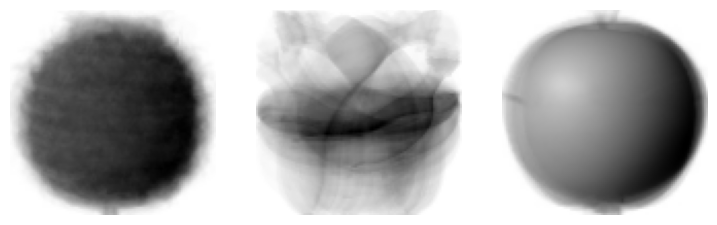

In [32]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)
# cluster_centers_ 속성은 fruits_2d 샘플의 클러스트 중심이기 때문에 각 중심을 이미지로 출력하려면 2차원 배열로 변환 필요

훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 **transform() 메서드** 포함

transform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할 수 있다는 의미

transform()은 2차원 입력만 받기 때문에, 슬라이싱 연산자를 활용하여 전달

In [ ]:
# 인덱스가 100인 샘플에 transform() 메서드 전달
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [35]:
# 가장 가까운 클러스터 중심을 예측 클래스로 출력
print(km.predict(fruits_2d[100:101]))

[0]


모든 군집 알고리즘이 **predict() 메서드**를 제공하는 것은 아님

즉, 새로운 샘플에 대해 클래스 레이블을 예측하지 못하는 군집 알고리즘도 있음

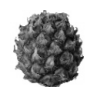

In [36]:
# 샘플 확인
draw_fruits(fruits[100:101])

In [38]:
# k-평균 알고리즘이 반복한 횟수 확인
print(km.n_iter_)

4


**이너셔(Inertia)**: <br>
k-평균(k-means) 알고리즘에서 각 클러스터 내부의 데이터가 중심(centroid)에 얼마나 가까운지를 나타내는 군집 응집도(클러스터 품질) 지표

- 값이 작을수록 → 클러스터가 잘 모여 있음(응집도 높음)
- 값이 크면 → 클러스터가 퍼져 있음(품질 낮음)

**엘보우 방법(Elbow Method)**: k값을 변화시키며 inertia를 그래프로 그린 뒤, 감소 효과가 크게 줄어드는 지점을 최적의 k로 선택하는 방법

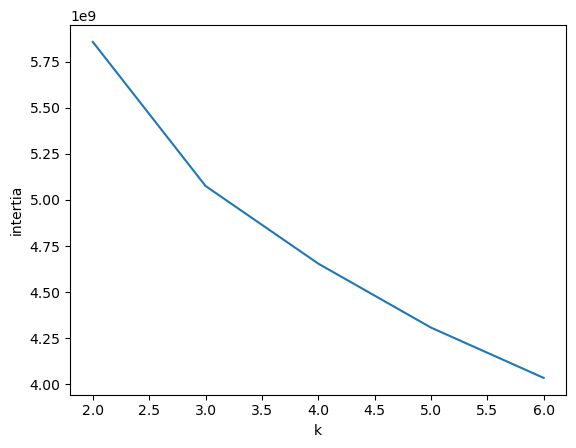

In [42]:
inertia = []
for k in range(2, 7):       
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('intertia')
plt.show()

---

#### 6-3. 주성분 분석
머신러닝에서의 **차원** = 데이터 한 개가 가지고 있는 특성(feature) 수

**차원 축소**: <br>
다수의 특성이 포함된 고차원 데이터를, 핵심 정보를 최대한 유지한 상태로 더 적은 수의 특성(저차원)으로 변환해 모델의 성능과 효율을 개선하는 과정

**주성분 분석(PCA)**: <br>
데이터의 분산이 가장 큰 방향을 찾아 그 방향을 기준으로 데이터를 표현함으로써, 정보 손실을 최소화하며 차원을 축소하는 알고리즘

주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음 

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듬

In [43]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy 

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-2, 100*100)

--2025-11-21 14:45:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-21 14:45:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-21 14:45:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... c

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)      # 주성분의 개수 지정
pca.fit(fruits_2d)              # 비지도 학습이기 때문에 fit() 메서드에 타깃을 지정하지 않음 

PCA(n_components=50)

In [ ]:
# PCA  클래스가 찾은 주성분 배열의 크기 확인
print(pca.components_.shape)        # 두 번쨰 차원은 항상 원본 데이터으 특성 개수와 같음 

(50, 10000)


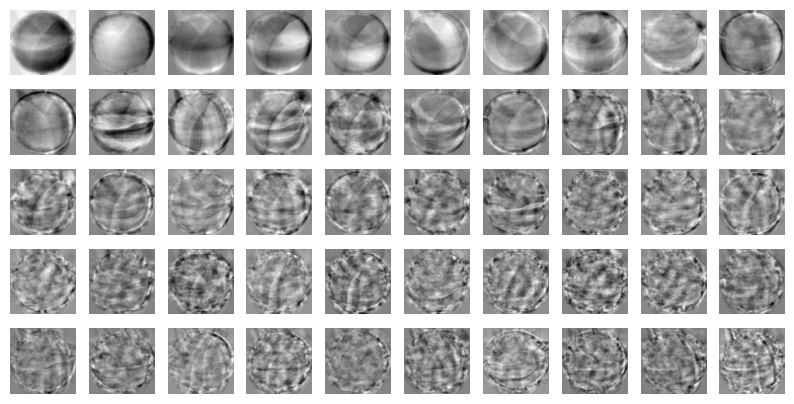

In [46]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [47]:
# PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄이기
print(fruits_2d.shape)

(300, 10000)


In [48]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
# 원본 데이터 재구성
# 차원 축소 모델이 원본 데이터를 얼마나 잘 보존했는지 평가하고, 최적의 주성분 수를 선택
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


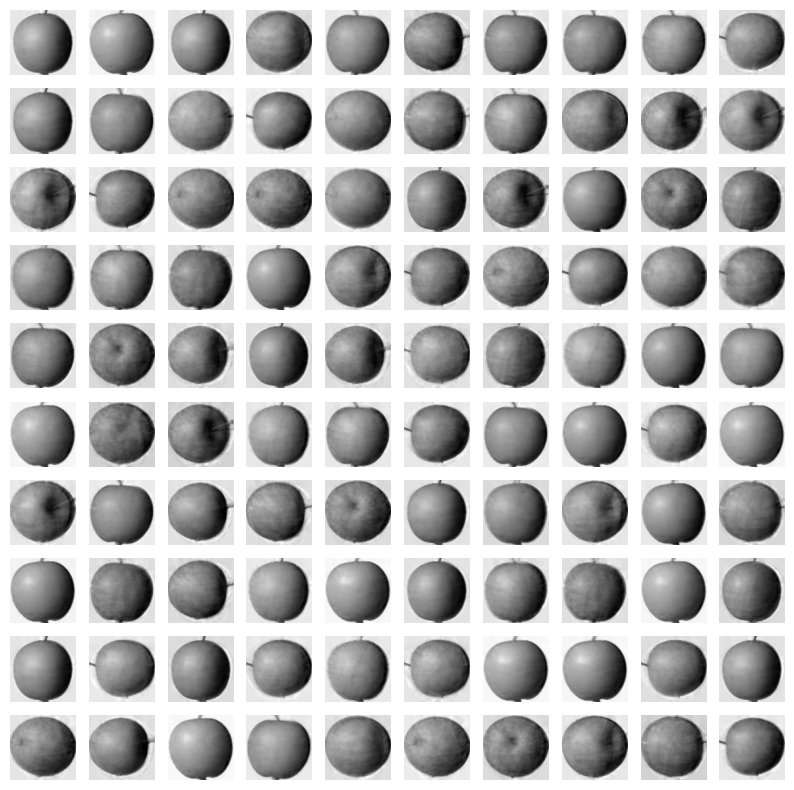

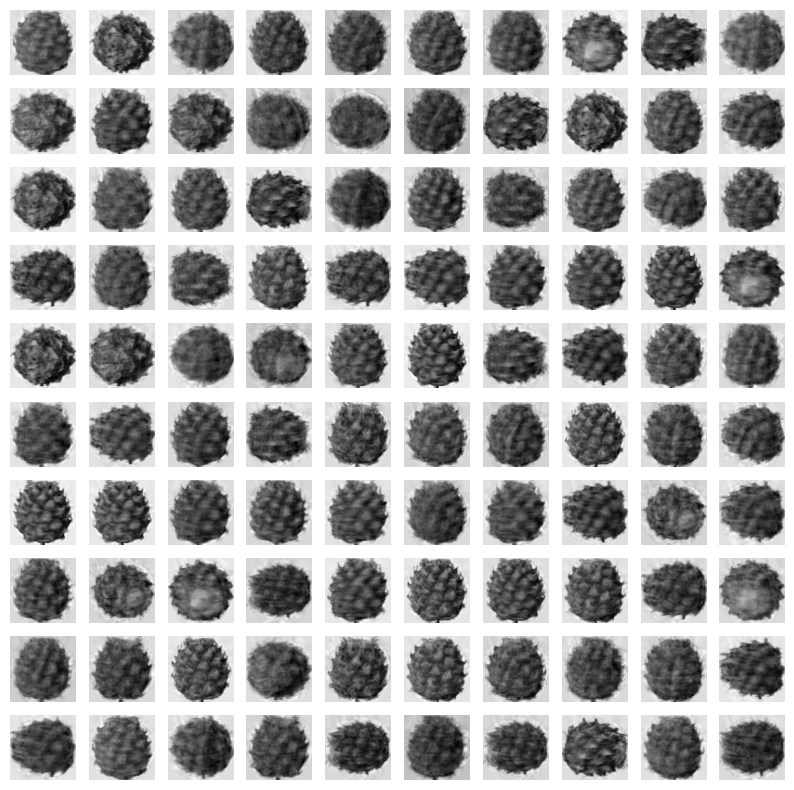

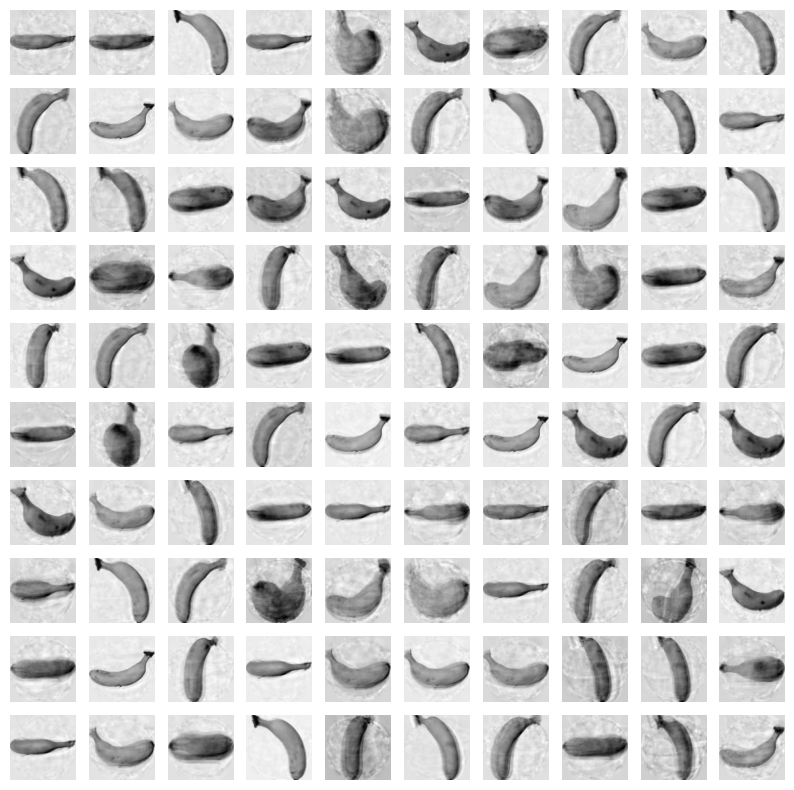

In [52]:
# 100 X 100 크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

**설명된 분산**: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA 클래스의 explained_variance_ratio_ : 각 주성분의 설명된 분산 비율이 기록

분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [53]:
print(np.sum(pca.explained_variance_ratio_))

0.9215666622223442


설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는 데 도움이 됨 

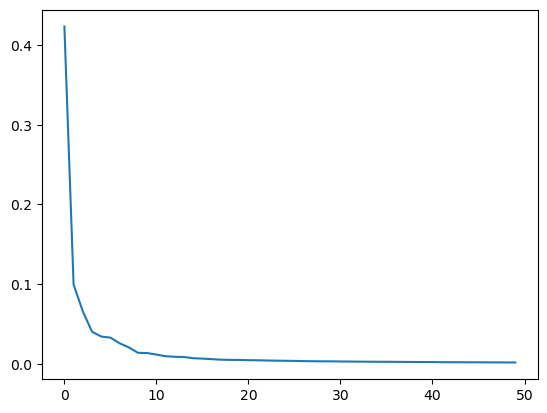

In [54]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [65]:
# 로지스틱 회귀 모델과 비교 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [66]:
# 타깃값 지정 
target = np.array([0]*100 + [1]*100 + [2]*100)      

In [67]:
# 성능 가늠을 위한 교차 검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.11180224418640136


In [68]:
# pca로 축소한 값과 교차 검증 폴드 훈련 시간 비교 
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.009929513931274414


50개의 특성만 사용했는데도 정확도가 99.7%로 동일하고 훈련 시간은 감소

→ PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

In [69]:
# n_components 매개변수에 설명된 분산의 비율을 입력
# 설명된 분산의 50%에 달하는 주성분 찾기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [70]:
# 찾은 주성분 개수 확인
print(pca.n_components_)

2


In [71]:
# 원본 데이터 반환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [72]:
# 교차 검증 결과 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.015802764892578126


/home/ai_study/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고(Convergence Warning： Ibfgs failed to converge) 출력

하지만 교차 검증의 결과가 충분히 좋기 때문에 무시해도 좋음

In [74]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 탐색
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


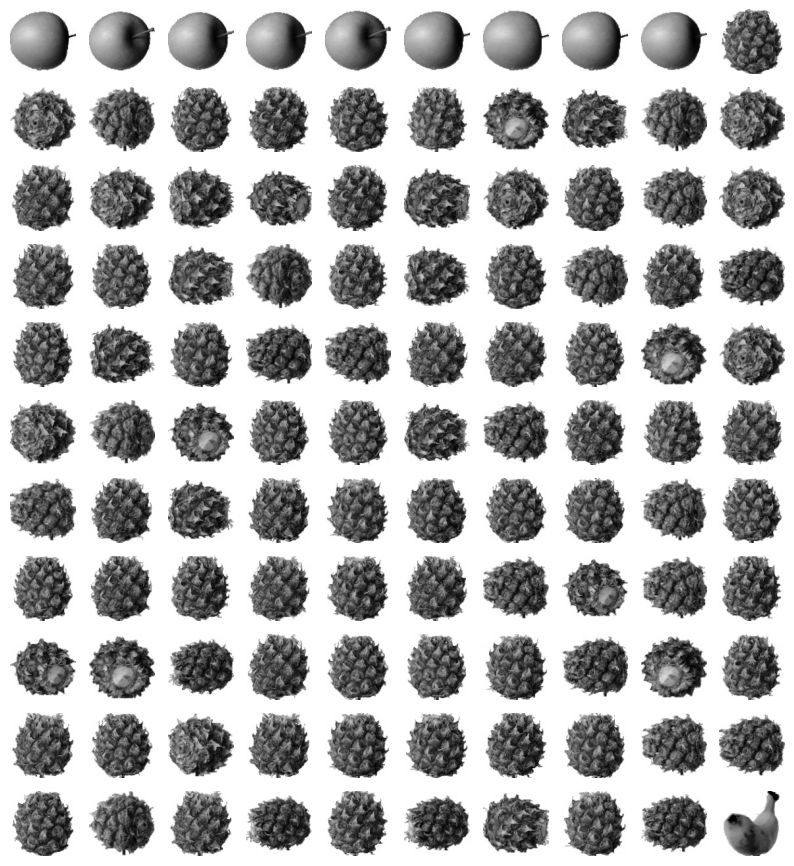

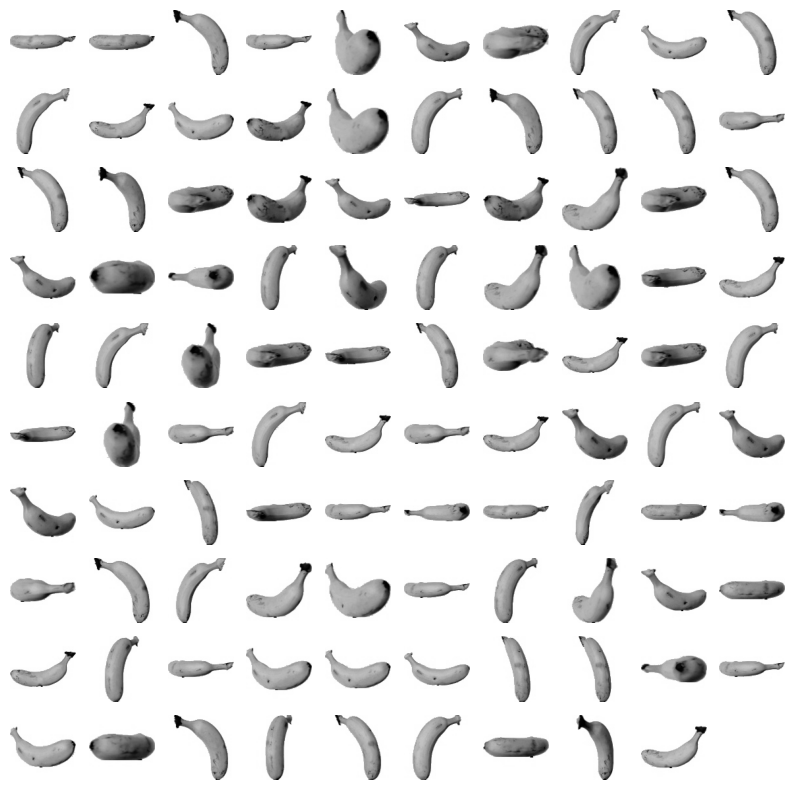

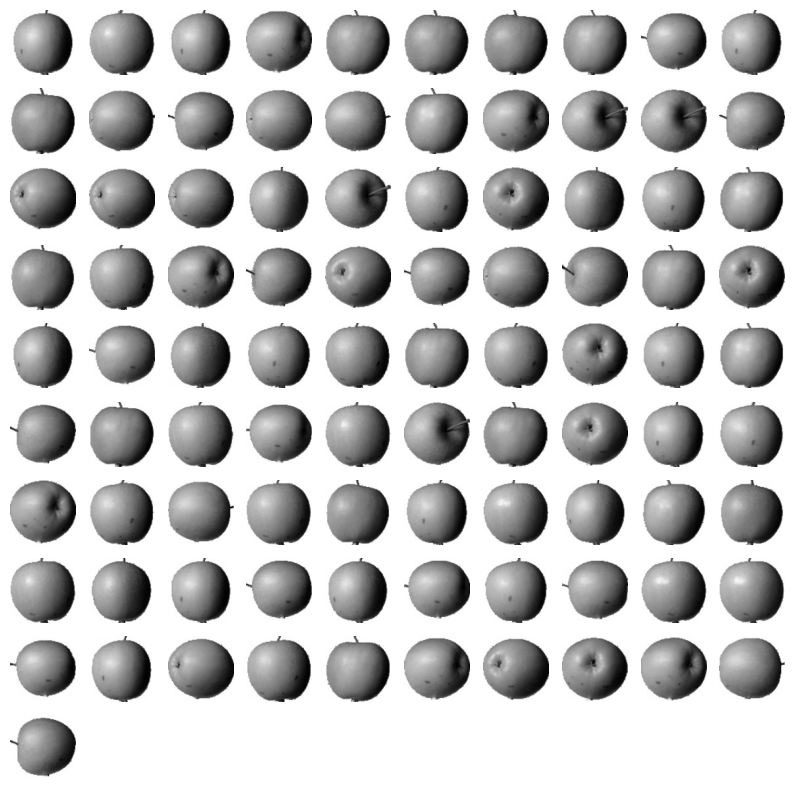

In [76]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

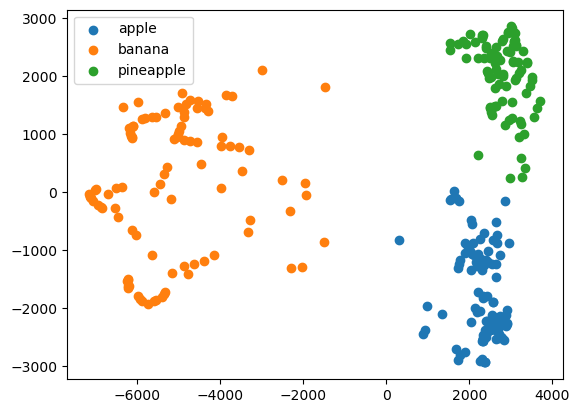

In [77]:
# km.labes_를 사용해 클러스터별로 나누어 산점도 출력
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

사과와 파인애플 클러스터의 경계가 가깝게 붙어 있기 때문에 이 두 클러스터의 샘플 몇 개가 혼동을 일으키기 쉬움

---

##### PCA 후 원본 데이터를 복원하는 핵심 이유 4가지
1. 차원 축소로 인해 손실된 정보가 얼마나 되는지 확인하기 위해
    
    → 복원 결과가 원본과 비슷하면 차원 축소가 좋은 품질로 수행된 것.

2. 주성분 개수(k)를 결정하기 위해

- 주성분이 너무 적으면 → 복원이 흐릿함 → 정보 손실 큼
- 주성분이 충분하면 → 복원이 원본과 거의 동일 → 정보 잘 보존됨

    → 재구성 결과를 보면서 최적의 주성분 개수를 결정할 수 있다.

3. PCA가 어떤 정보를 유지하고 무엇을 버렸는지 직관적으로 이해하기 위해

4. 노이즈 제거(denoising) 효과를 확인하기 위해

    상위 주성분만 사용해 복원하면 원래 데이터의 구조는 남고 고차원 잡음은 제거된다.

    → 복원 결과를 보면 PCA 기반 노이즈 제거가 잘 되었는지 평가 가능